# Sales Analysis

In [1]:
#### Import necessary libraries & read csv file 
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('data.csv')
df.head(8)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

### Drop rows of NAN 

In [2]:
df.dropna(inplace=True)
#df.shape

### Get rid of text in "order date" column and then convert it into datetime

In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Order Date'].dtypes

dtype('<M8[ns]')

### Make columns correct type ( By using __" to_numeric " __  , Convert the columns with numeric values into           integer or float ) . 
check this link to know how to use it  https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

In [4]:
numeric=['Quantity Ordered', 'Price Each']
for i in numeric:
    df[i] = pd.to_numeric(df[i],errors='coerce')
df[numeric].dtypes

Quantity Ordered    float64
Price Each          float64
dtype: object

### Augment data with additional columns

In [5]:
#### Add month column
df['Month']=df['Order Date'].dt.month

In [6]:
#### Add city column (containing city & state in this columns.) ex: df['City'][0] = 'Dallas (TX)'
state=df['Purchase Address'].str.split(',',expand=True)
df['City'] = state[1] + '(' + state[2].str.split(' ',expand=True)[1] + ')'
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,Dallas(TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,Boston(MA)
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles(CA)
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles(CA)
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,Los Angeles(CA)


## Data Exploration!

In [7]:
#### Question 1: What was the best month for sales? How much was earned that month?
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
## sales = Quantity_order x price Each
sales = df.groupby('Month')['Sales'].sum()
print('best month is:',sales.idxmax())
print('best earns is:',sales.max())

best month is: 12.0
best earns is: 4613443.34


In [26]:
#### Question 2: What city sold the most product?
most_city = df.groupby('City')['Quantity Ordered'].sum().sort_values(ascending=False)
most_city.index[0]

' San Francisco(CA)'

In [9]:
#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
## Step1: Add hour column
df['Hour'] = df['Order Date'].dt.hour

Text(0.5, 1.0, 'Orders by Hour')

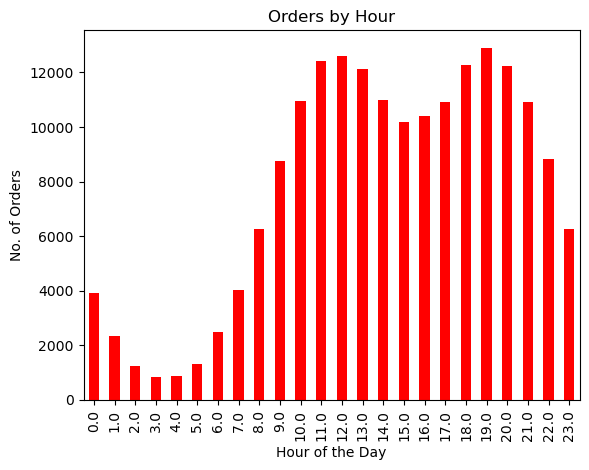

In [10]:
## Step2: show by using plot , get the most hour which clients make orders
hourly_orders =df['Hour'].value_counts().sort_index()
hourly_orders.plot(kind='bar', color='red')
plt.xlabel('Hour of the Day')
plt.ylabel('No. of Orders')
plt.title('Orders by Hour')

In [32]:
#### Question 4: What products are most often sold together?
prod = df.groupby(['Hour','Order ID'])['Product'].sum()
prod
#prod.drop_duplicates()

Hour  Order ID
0.0   141253                 AA Batteries (4-pack)
      141296                  USB-C Charging Cable
      141384      Google PhoneUSB-C Charging Cable
      141494                 AA Batteries (4-pack)
      141553            Bose SoundSport Headphones
                                ...               
23.0  319602                AAA Batteries (4-pack)
      319641                    Macbook Pro Laptop
      319645                       Vareebadd Phone
      319652                AAA Batteries (4-pack)
      319656              Apple Airpods Headphones
Name: Product, Length: 178437, dtype: object

In [12]:
#### What product sold the most? Why do you think it sold the most?
x=df.groupby('Product')['Quantity Ordered'].sum()
x.idxmax()
#df.query("Product == @x")

'AAA Batteries (4-pack)'